# Creating pseudo visualization in python

## Cleaning the data

In [1]:
# import the required moduls

import pandas as pd
import matplotlib as plt
import numpy as np

In [2]:
# read in the data

df = pd.read_csv("./01_data/data.csv", delimiter=",")
df_full = pd.read_csv("./01_data/20200420_SPARQL_ExportV3.csv", delimiter=",")
df_query = pd.read_csv("./01_data/query.csv", delimiter=",")

In [3]:
df.head()

,person,value,valueLabel,Born,Child
0,http://www.wikidata.org/entity/Q165421,http://www.wikidata.org/entity/Q11030,Journalismus,1929-07-28T00:00:00Z,http://www.wikidata.org/entity/Q230303
1,http://www.wikidata.org/entity/Q165421,http://www.wikidata.org/entity/Q11030,Journalismus,1929-07-28T00:00:00Z,http://www.wikidata.org/entity/Q316064
2,http://www.wikidata.org/entity/Q165421,http://www.wikidata.org/entity/Q11030,Journalismus,1929-07-28T00:00:00Z,http://www.wikidata.org/entity/Q3290402
3,http://www.wikidata.org/entity/Q21339404,http://www.wikidata.org/entity/Q1986,2003,1977-01-18T00:00:00Z,NaN
4,http://www.wikidata.org/entity/Q165421,http://www.wikidata.org/entity/Q11030,Journalismus,1929-07-28T00:00:00Z,http://www.wikidata.org/entity/Q75326753


In [4]:
# remove the "http://www.wikidata.org/entity/" prefix from the colums person, value and Child

df["person"] = df["person"].replace("http://www.wikidata.org/entity/","", regex = True)
df["value"] = df["value"].replace("http://www.wikidata.org/entity/","", regex = True)
df["Child"] = df["Child"].replace("http://www.wikidata.org/entity/","", regex = True)

In [5]:
# clean data, remove "http://www.wikidata.org/entity/" prefix

def remove_prefix(x):
        
    x["person"] = x["person"].replace("http://www.wikidata.org/entity/","", regex = True)
    x["value"] = x["value"].replace("http://www.wikidata.org/entity/","", regex = True)
    x["Child"] = x["Child"].replace("http://www.wikidata.org/entity/","", regex = True)

In [6]:
df.head()

,person,value,valueLabel,Born,Child
0,Q165421,Q11030,Journalismus,1929-07-28T00:00:00Z,Q230303
1,Q165421,Q11030,Journalismus,1929-07-28T00:00:00Z,Q316064
2,Q165421,Q11030,Journalismus,1929-07-28T00:00:00Z,Q3290402
3,Q21339404,Q1986,2003,1977-01-18T00:00:00Z,NaN
4,Q165421,Q11030,Journalismus,1929-07-28T00:00:00Z,Q75326753


In [7]:
# remove the timestamp from the column Born

df["Born"] = pd.to_datetime(df['Born'])
df["Born"] = df["Born"].dt.date

In [8]:
# remove the timestamp from the column born

def remove_timestamp(x):
    
    x["Born"] = pd.to_datetime(x['Born'])
    x["Born"] = x["Born"].dt.date

In [9]:
'''
Ask wether or not we should add multiple kids from the same person
'''

# df.drop_duplicates(subset=["person"])

'\nAsk wether or not we should add multiple kids from the same person\n'

In [10]:
# create a new column with just the year, the parent (person) was born

df["Born_year"] = pd.DatetimeIndex(df["Born"]).year

In [11]:
# create a column with the year the parent was born in

def get_dob_parent(x):
    
    x["Born_year"] = pd.DatetimeIndex(x["Born"]).year

In [12]:
df.head()

,person,value,valueLabel,Born,Child,Born_year
0,Q165421,Q11030,Journalismus,1929-07-28,Q230303,1929
1,Q165421,Q11030,Journalismus,1929-07-28,Q316064,1929
2,Q165421,Q11030,Journalismus,1929-07-28,Q3290402,1929
3,Q21339404,Q1986,2003,1977-01-18,NaN,1977
4,Q165421,Q11030,Journalismus,1929-07-28,Q75326753,1929


In [13]:
df["person"].value_counts()

Q165421       4
Q50437943     2
Q55038248     2
Q365628       2
Q4055592      1
Q55955766     1
Q16625611     1
Q4062321      1
Q10799144     1
Q4512885      1
Q4095539      1
Q708464       1
Q80151547     1
Q47506337     1
Q18634148     1
Q47170765     1
Q30921945     1
Q47506299     1
Q47506365     1
Q47506360     1
Q6110805      1
Q4140917      1
Q4521662      1
Q106328215    1
Q60695333     1
Q16302728     1
Q56759969     1
Q99767894     1
Q10290183     1
Q4317546      1
Q4160798      1
Q5920394      1
Q95726655     1
Q6243642      1
Q21339404     1
Q5709637      1
Q5791547      1
Q87749476     1
Q15065525     1
Q28852336     1
Q94994874     1
Q62006199     1
Q99829988     1
Name: person, dtype: int64

In [14]:
df["Born_year"]=df["Born_year"].astype(float)

## Full Dataset

<p>Containing all academics, who have children</p>

In [15]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83408 entries, 0 to 83407
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   person      83408 non-null  object
 1   value       83408 non-null  object
 2   valueLabel  83408 non-null  object
 3   Born        83408 non-null  object
 4   Child       3040 non-null   object
dtypes: object(5)
memory usage: 3.2+ MB


In [16]:
df_full["person"] = df_full["person"].replace("http://www.wikidata.org/entity/","", regex = True)
df_full["value"] = df_full["value"].replace("http://www.wikidata.org/entity/","", regex = True)
df_full["Child"] = df_full["Child"].replace("http://www.wikidata.org/entity/","", regex = True)

In [17]:
df_full["Born_year"] = pd.DatetimeIndex(df_full["Born"]).year

In [18]:
df_full.head()

,person,value,valueLabel,Born,Child,Born_year
0,Q165421,Q11030,Journalismus,1929-07-28T00:00:00Z,Q230303,1929
1,Q165421,Q11030,Journalismus,1929-07-28T00:00:00Z,Q316064,1929
2,Q165421,Q11030,Journalismus,1929-07-28T00:00:00Z,Q3290402,1929
3,Q21339404,Q1986,2003,1977-01-18T00:00:00Z,NaN,1977
4,Q165421,Q11030,Journalismus,1929-07-28T00:00:00Z,Q75326753,1929


In [19]:
df_full.drop(["value", "Born"], axis=1)

,person,valueLabel,Child,Born_year
0,Q165421,Journalismus,Q230303,1929
1,Q165421,Journalismus,Q316064,1929
2,Q165421,Journalismus,Q3290402,1929
3,Q21339404,2003,NaN,1977
4,Q165421,Journalismus,Q75326753,1929
...,...,...,...,...
83403,Q110197975,Q110196743,NaN,1916
83404,Q90252123,Q108891927,NaN,1963
83405,Q87769173,Q109969317,NaN,1964
83406,Q110197456,Q110197097,NaN,1908


## Calculating the percentage

In [20]:
df_full["person"].value_counts()

Q25706652     24
Q17380952     18
Q26215688     16
Q60772        14
Q28571277     12
              ..
Q111017471     1
Q111017613     1
Q106956651     1
Q111036470     1
Q110197456     1
Name: person, Length: 72394, dtype: int64

In [21]:
df_test = df_query.drop_duplicates(subset=["Child"])

In [26]:
df_test["Born_year"] = pd.DatetimeIndex(df_test["Born"]).year

/var/folders/wm/t87_jx651gvfm3t05dzg24440000gn/T/ipykernel_18290/1743020424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Born_year"] = pd.DatetimeIndex(df_test["Born"]).year


In [44]:
remove_prefix(df_test)

/var/folders/wm/t87_jx651gvfm3t05dzg24440000gn/T/ipykernel_18290/1915187613.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["person"] = x["person"].replace("http://www.wikidata.org/entity/","", regex = True)
/var/folders/wm/t87_jx651gvfm3t05dzg24440000gn/T/ipykernel_18290/1915187613.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["value"] = x["value"].replace("http://www.wikidata.org/entity/","", regex = True)
/var/folders/wm/t87_jx651gvfm3t05dzg24440000gn/T/ipykernel_18290/1915187613.py:7: Sett

In [45]:
df_test

,person,value,valueLabel,Born,Child,Born_year,Child_academic
0,Q165421,Q11030,journalism,1929-07-28T00:00:00Z,Q230303,1929,0
1,Q165421,Q11030,journalism,1929-07-28T00:00:00Z,Q316064,1929,0
2,Q165421,Q11030,journalism,1929-07-28T00:00:00Z,Q3290402,1929,0
3,Q165421,Q11030,journalism,1929-07-28T00:00:00Z,Q75326753,1929,0
4,Q55038248,Q5263,1947,1912-03-06T00:00:00Z,Q15088169,1912,0
6,Q11854074,Q42973,architect,1942-06-06T00:00:00Z,Q380150,1942,0
7,Q269895,Q41506,Stanford University,1955-10-25T00:00:00Z,Q72595401,1955,0
8,Q3191952,Q42973,architect,1920-10-23T00:00:00Z,Q18633597,1920,0
9,Q3191952,Q42973,architect,1920-10-23T00:00:00Z,Q18698772,1920,0
10,Q3191952,Q42973,architect,1920-10-23T00:00:00Z,Q20254276,1920,0


In [46]:
df_test.reset_index

<bound method DataFrame.reset_index of           person       value  \
0        Q165421      Q11030   
1        Q165421      Q11030   
2        Q165421      Q11030   
3        Q165421      Q11030   
4      Q55038248       Q5263   
6      Q11854074      Q42973   
7        Q269895      Q41506   
8       Q3191952      Q42973   
9       Q3191952      Q42973   
10      Q3191952      Q42973   
11      Q4131503      Q40634   
12     Q13533346      Q42973   
13        Q57434      Q81096   
14        Q57434      Q81096   
15     Q43186301      Q81096   
18        Q67449     Q121594   
19        Q67449     Q121594   
20        Q67449     Q121594   
21       Q107319     Q121594   
22       Q107319     Q121594   
23       Q107319     Q121594   
24       Q107319     Q121594   
25       Q107319     Q121594   
26       Q192695     Q121594   
32       Q319803     Q121594   
33       Q132489     Q121594   
34       Q132489     Q121594   
35       Q235032     Q121594   
36       Q164428     Q121594   
3

In [47]:
df_test.loc[df_test["person"] == "Q25706652"]

,person,value,valueLabel,Born,Child,Born_year,Child_academic
176,Q25706652,Q163727,bachelor's degree,1930-10-30T00:00:00Z,Q24849508,1930,0
177,Q25706652,Q163727,bachelor's degree,1930-10-30T00:00:00Z,Q45832327,1930,0
178,Q25706652,Q163727,bachelor's degree,1930-10-30T00:00:00Z,Q47491099,1930,0
179,Q25706652,Q163727,bachelor's degree,1930-10-30T00:00:00Z,Q47524192,1930,0


In [48]:
pd.set_option("display.max_rows", None)

df_test["Born_year"].value_counts().sort_values(ascending=True)

1976     1
1986     1
1983     1
1974     2
1975     2
1970     2
1981     3
1971     3
1982     4
1978     5
1979     5
1977     6
1969     6
1972     7
1960     8
1980     8
1973     9
1968    11
1963    13
1966    13
1961    14
1967    14
1964    15
1965    15
1956    16
1962    16
1959    18
1917    18
1958    21
1914    22
1945    24
1952    24
1954    24
1904    25
1909    25
1906    25
1905    25
1943    26
1919    27
1950    28
1918    29
1957    30
1916    31
1912    31
1953    31
1903    32
1948    32
1955    32
1907    33
1920    33
1944    33
1901    34
1911    34
1946    36
1913    36
1951    36
1924    38
1922    38
1910    38
1925    39
1902    39
1934    40
1939    41
1938    41
1921    41
1942    41
1949    42
1935    43
1941    43
1933    43
1926    43
1936    44
1908    45
1940    46
1931    46
1927    47
1915    50
1947    51
1928    53
1930    55
1937    55
1929    57
1932    63
1923    64
Name: Born_year, dtype: int64

In [58]:
df_test = df_test.drop(["value", "Born"], axis=1)

In [50]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2341 entries, 0 to 3041
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   person          2341 non-null   object
 1   value           2341 non-null   object
 2   valueLabel      2341 non-null   object
 3   Born            2341 non-null   object
 4   Child           2341 non-null   object
 5   Born_year       2341 non-null   int64 
 6   Child_academic  2341 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 146.3+ KB


In [51]:
df_test["Child_academic"] = df_test.person.isin(df_full.Child).astype(int)

/var/folders/wm/t87_jx651gvfm3t05dzg24440000gn/T/ipykernel_18290/2071239997.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Child_academic"] = df_test.person.isin(df_full.Child).astype(int)


In [59]:
df_test

,person,valueLabel,Child,Born_year,Child_academic
0,Q165421,journalism,Q230303,1929,0
1,Q165421,journalism,Q316064,1929,0
2,Q165421,journalism,Q3290402,1929,0
3,Q165421,journalism,Q75326753,1929,0
4,Q55038248,1947,Q15088169,1912,0
6,Q11854074,architect,Q380150,1942,0
7,Q269895,Stanford University,Q72595401,1955,0
8,Q3191952,architect,Q18633597,1920,0
9,Q3191952,architect,Q18698772,1920,0
10,Q3191952,architect,Q20254276,1920,0


In [53]:
df_test["Child_academic"].value_counts()

0    2281
1      60
Name: Child_academic, dtype: int64

In [54]:
df_test["Child_academic"].value_counts(sort=True)

0    2281
1      60
Name: Child_academic, dtype: int64

In [60]:
df_test.to_csv("child_academic_count.csv", sep=';')

## Visualization

Idea:

Y-axis is the amount of children, whose parents born in that year, were academics
X-axis is the birthdate of the parents

<AxesSubplot:>

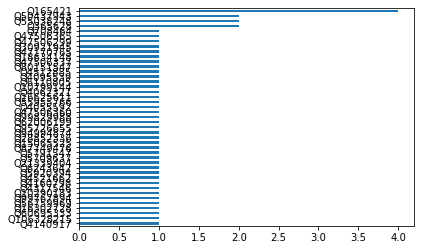

In [36]:
s = df.person.value_counts().sort_values()
s.plot(kind = "barh")